**Load dataset**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline

wine = np.loadtxt("./winequality-white2.csv", delimiter=",") #required deleting the headers for this to work

print (wine.shape)

# store feature matrix in "X"
X = wine[:,0:10]

# store response vector in "y"
y = wine[:,11]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

(4898, 12)
(3918, 10) (3918,)
(980, 10) (980,)


/home/kellgon/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.36326531 0.40612245 0.4122449  0.39183673 0.39183673 0.40816327
 0.39591837 0.41836735 0.44989775 0.34969325]


**MULTIVARIATE ANALYSIS / GRID SEARCH**


In [12]:
# define the parameter values that should be searched
k_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
#weight_options = ['uniform', 'distance']

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

In [13]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)

/home/kellgon/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=297, p=2,
                                            weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                         100, 150, 200, 250, 300, 350, 400, 450,
                                         500, 550, 600, 650, 700, 750, 800, 850,
                                         900, 950, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [15]:
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.582187,0.021203,{'n_neighbors': 10}
1,0.592656,0.019394,{'n_neighbors': 20}
2,0.602614,0.022409,{'n_neighbors': 30}
3,0.606439,0.022605,{'n_neighbors': 40}
4,0.612056,0.018939,{'n_neighbors': 50}
5,0.613844,0.021134,{'n_neighbors': 60}
6,0.608743,0.021172,{'n_neighbors': 70}
7,0.610530,0.024092,{'n_neighbors': 80}
8,0.613593,0.022293,{'n_neighbors': 90}
9,0.615381,0.021267,{'n_neighbors': 100}


In [16]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6204805835377629
{'n_neighbors': 350}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=350, p=2,
                     weights='distance')


Text(0, 0.5, 'Cross-Validated Accuracy')

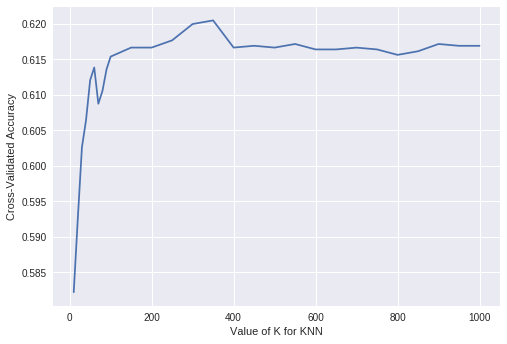

In [17]:
# plot the results
grid_mean_scores = grid.cv_results_['mean_test_score'] # array of mean scores only

plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

**PREDICT**

In [7]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=297, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=297, p=2,
                     weights='distance')

In [8]:
# store the predicted response values
y_pred = knn.predict(X_test)
print(len(y_pred))

# compute classification accuracy for the logistic regression model
print(metrics.accuracy_score(y_test, y_pred))

980
0.6051020408163266


In [9]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

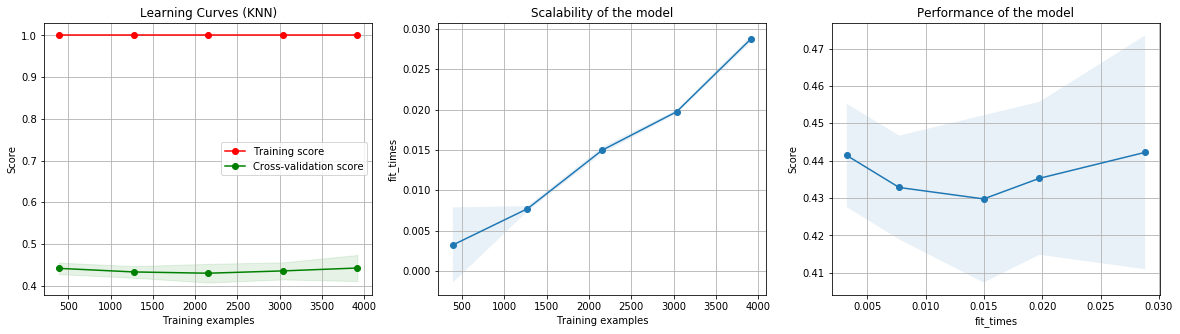

In [10]:
from sklearn.model_selection import learning_curve

title = "Learning Curves (KNN)"
knn_learn = KNeighborsClassifier(n_neighbors=297, weights='distance')
plot_learning_curve(knn_learn, title, X, y, cv=5)

plt.show()

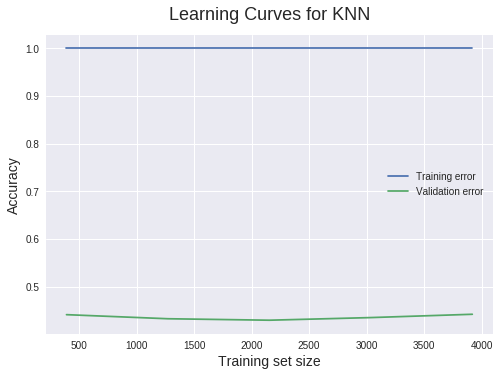

In [11]:
train_sizes, train_scores, validation_scores = learning_curve(estimator=knn_learn, X=X, y=y, cv=5, scoring ='accuracy')

train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')

plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning Curves for KNN', fontsize=18, y=1.03)
plt.legend()